# 4206/5206 Final Exam - Fall 2023

## How the news talks about Bitcoin

We will examine how The Guardian, a UK newsroom published articles about Bitcoin from 2020/05/01 to 2021/05/31 and how it will relate to Bitcoin prices.

We chose this period because May 2020 was just before the massive rise in Bitcoin prices and May 2021 was when the first massive drop in prices occurred.

Bitcoin is a virtual currency with a limited supply. You can treat it like a stock where its price depends on the demand.

#### Exam rules:

- This is an open-book, open-note, open-internet exam.
- You cannot consult another intelligent being for this exam nor should you distribute this exam on any platform. You must complete your own exam.
- You need to submit a `.ipynb` file on **CourseWorks**.
- All phones should be turned off during the exam.
- You should close all browser tabs related to any form of messaging/emailing to avoid suspicions around cheating.
- The following can incur a penalty on your exam:
  - Any attempts to print out all of the data (unless explicitly asked for) will be penalized.
  - Hardcoding solutions unless you were instructed to do so.
  - Asking the following type of questions:
    - Question about the differences between your solution and the backup dataset.
    - Question about partial credit or specific grade distributions within the problem
    - Questions about installing Jupyter Notebook or packages used in class
    - The backup datasets are not meant to validate your answers and steps have been taken to prevent you from doing so. Using the backup datasets will only result in a small penalty for the question that was meant to generate the dataset. You can later remove the use of the backup dataset if you solved the problem, then there will be no penalty.
    - If you use an external source to solve the exam, please cite the URL with a comment so we know you grabbed it from online and not from each other.
    - Please read the entire exam before asking questions

## Honor Code

We, the students of Columbia University, hereby pledge to value the integrity of our ideas and the ideas of others by honestly presenting our work, respecting authorship, and striving not simply for answers but for understanding in the pursuit of our common scholastic goals. In this way, we seek to build an academic community governed by our collective efforts, diligence, and Code of Honor.

I affirm that I will not plagiarize, use unauthorized materials, or give or receive illegitimate help on assignments, papers, or examinations. I will also uphold equity and honesty in the evaluation of my work and the work of others. I do so to sustain a community built around this Code of Honor.

Have you read and agree to the honor code?
- To answer this, please create a variable called `i_will_follow_the_honor_code` and assign the appropriate `True` or `False` value to it.
- You must also create a string variable called `UNI` that contains your Columbia UNI.

WARNING: You will receive 0 points for the exam if you do not get this problem correct.


In [ ]:
i_will_follow_the_honor_code = True
UNI = "aa3744"

## Q0 - Querying The Guardian API (20 pts)

Please leverage the [search API](https://open-platform.theguardian.com/documentation/search) from The Guardian to get data that satisfy the following requirements.

- The content should mention the word `bitcoin`
- Data between 2020/05/01 to 2021/05/31
- Please use the `requests` library in your answer
- We want all the associated metadata tags (the default does not return any). Hint: search for "metadata tags" in the documentation)
- Your final answer should be a list, named `guardian`, containing records from the `results` field, i.e. each element in the list should be a result.

Important, the free account has several limits:
- It limits 1 call per second (500 calls per day), please use [`time.sleep()`](https://docs.python.org/3/library/time.html#time.sleep)
- It can only return a finite number of records per call, please see instructions on [paging](https://open-platform.theguardian.com/documentation/). Not specifying the page will default to `page=1`.
- It limits to 10 results per page, please adjust your `page-size` parameter to the maximum value
- The total number of pages associated with any query is called `pages`.

For grading, please use a `print()` statement for each of the following:
- Please report the number of records in `guardian` (Your answer should have between 200 and 250 data)
- Please report the maximum number of tags across all results

In [ ]:
import requests
import time

def fetch_guardian_data(query, from_date, to_date, api_key):
    base_url = "https://content.guardianapis.com/search"
    page_size = 50  # maximum allowed
    guardian = []

    params = {
        'q': 'bitcoin',
        'from-date': from_date,
        'to-date': to_date,
        'show-tags': 'all',
        'page-size': page_size,
        'api-key': api_key
    }

    # Initial request to get the total number of pages
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        return None  # Error handling

    data = response.json()
    total_pages = data['response']['pages']

    # Fetch data page by page
    for page in range(1, total_pages + 1):
        params['page'] = page
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            page_data = response.json()['response']['results']
            guardian.extend(page_data)
        time.sleep(1)  # Respect the rate limit

    return guardian

api_key = "fb7e7abe-22c8-49a4-a73a-ec10b85b5c2f"
guardian = fetch_guardian_data("bitcoin", "2020-05-01", "2021-05-31", api_key)
# guardian  # This will be the list containing the articles data

In [ ]:
print(len(guardian))


239


In [ ]:
def find_max_tags(guardian_data):
    max_tags = 0
    for article in guardian_data:
        tag_count = len(article.get('tags', []))
        if tag_count > max_tags:
            max_tags = tag_count
    return max_tags

if guardian_articles:
    max_tags = find_max_tags(guardian)
    print(f"The maximum number of tags across all results is: {max_tags}")
else:
    print("No data fetched or there was an error.")

The maximum number of tags across all results is: 37


## Q1 - Wrangling data (15 pts)

If you couldn't finish Q0, please use the file `Q0_backup_guardian.json`

To facilitate analysis later, please wrangle the data in `guardian` into a pandas data frame, named `guardian_df`, where each row is a record from `guardian` with the following columns:
- `date`: Published date, e.g. "2021-05-01", this should be of the type `datetime`.
- `sectionName`: section name
- `pillarName`: pillar name
- `webTitle`: web title
- `{TAG_KEYWORD_WEBTITLE}`: these should be 0-1 columns indicating whether the corresponding tag is associated with this record.
  - You should replace `{TAG_KEYWORD_WEBTITLE}` with the wording of the actual `webTitle` of the tag.
  - Please only keep the tags where their `type` is `"keyword"`

An example output should look like (these numbers are made-up):
```
   date  ... Bitcoin Cryptocurrencies ... Anthony Albanese
0  2021-05-22  ...     1.0              1.0 ...              0.0
1  2021-04-11  ...     1.0.             0.0 ...              0.0
```

For grading, please:
- Report the number of rows and columns in `guardian_df` using a `print()` statement.
- Report the frequency of the different possible values in the `pillarName` column from `guardian_df`.
- Report the 5 most popular keyword tag(s) used across all records.

In [ ]:
import pandas as pd

  # This should be the list containing the articles data

# Initialize an empty list to store the records
records = []

# Process each article to extract information and keyword tags
for article in guardian:
    # Extract the basic information
    record = {
        'date': pd.to_datetime(article['webPublicationDate']).date(),
        'sectionName': article['sectionName'],
        'pillarName': article['pillarName'],
        'webTitle': article['webTitle'],
    }

    # Process keyword tags
    for tag in article.get('tags', []):
        if tag['type'] == 'keyword':
            # Create a column for each keyword tag's webTitle
            tag_title = tag['webTitle'].replace(" ", "_")  # Replace spaces with underscores
            record[tag_title] = 1

    # Add the record to the list
    records.append(record)

# Convert the list of records into a DataFrame
guardian_df = pd.DataFrame(records)

# Fill NaN values with 0 for keyword columns and ensure correct data types
keyword_columns = [col for col in guardian_df.columns if col not in ['date', 'sectionName', 'pillarName', 'webTitle']]
guardian_df[keyword_columns] = guardian_df[keyword_columns].fillna(0).astype(int)

In [ ]:
print(guardian_df.shape)
pillarName_freq = guardian_df['pillarName'].value_counts()
print("Frequency of different values in the 'pillarName' column:")
print(pillarName_freq)

(236, 370)
Frequency of different values in the 'pillarName' column:
News         190
Arts          20
Opinion       12
Lifestyle     10
Sport          4
Name: pillarName, dtype: int64


In [ ]:
# Report the 5 most popular keyword tags
# First, filter out non-keyword columns
keyword_columns = [col for col in guardian_df.columns if col not in ['date', 'sectionName', 'pillarName', 'webTitle']]

# Sum the values of the keyword columns
keyword_counts = guardian_df[keyword_columns].sum()

# Find the 5 most popular keyword tags
top_5_keywords = keyword_counts.nlargest(5)
print("The 5 most popular keyword tags used across all records:")
print(top_5_keywords)


The 5 most popular keyword tags used across all records:
Business            125
Cryptocurrencies     74
Technology           73
Stock_markets        67
Bitcoin              62
dtype: int64


## Q2 - Getting the weekly bitcoin prices (20 pts)

In `btc_weekly_3months.csv` we have the weekly bitcoin prices over 3 months (we need it to match our news data) and `btc_daily_5years.csv` has the daily bitcoin prices over 5 years. Both datasets end in 2023.

Please only focus on the columns: `'Date'`, `'Adj Close'`, and `'Volume'` for the entire exam.

- There is a single date value in the weekly records instead of a date range, what does this date correspond to in the week? Please also explain the relationship between the weekly vs daily values of "Adj Close" and "Volume". Please verify your claims using `assert` statements by checking your logic applied to daily is the same as in the weekly data. This assertion only needs to be demonstrated on one week.
  - Hint: focus on a single week and look at the data!
  - You can hardcode this part of the question
  - In finance, "close" means the price at the end of the respective period. The "Adj" often refers to adjusted to seasonality.
  - In finance, "volume" means the number of units in the transaction.
- Please produce the weekly data **over the 5 years** using the daily dataset for `Adj Close` and `Volume` according to the relationship you see. Please call this variable `btc_weekly`.
  - `btc_weekly` should have 3 columns, the `Date`, `Adj Close`, and `Volume`
  - HINT: To get the date of the "following Sunday" for any date, you can do
  ```
  from datetime import date, timedelta
  dt = date(2023, 12, 8)
  days_until_sunday = 6 - dt.weekday()
  sunday_date = dt + timedelta(days=days_until_sunday)
  print(sunday_date)
  ```
- Please print out the first 3 and last 3 weeks of data in `btc_weekly`, after sorting by `Date`.
- Please print out the number of rows and columns in the dataset.

In [ ]:
import pandas as pd
btc_week = pd.read_csv("btc_weekly_3months.csv")
btc_day = pd.read_csv("btc_daily_5years.csv")

drop_col = ["Open", "High", "Low", "Close"]
btc_week = btc_week.drop(columns = drop_col)
btc_day = btc_day.drop(columns = drop_col)


In [ ]:
ex_week = btc_week.iloc[-1: :]
ex_week

,Date,Adj Close,Volume
11,2023-11-20,37479.121094,130439893957


In [ ]:
# we focus on 2023/11/20 - 2023/11/26
_day = btc_day.iloc[-7: :]
assert  _day['Adj Close'].iloc[-1] == ex_week["Adj Close"].iloc[-1]
# we can see the ad.closing price of this week represented by 2023-11-20 is 37479.121094, which is the same
# as the day 2023-11-26

In [ ]:
from datetime import timedelta

# Convert 'Date' in the daily data to datetime format
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

# Function to get the following Sunday for any given date
def get_next_sunday(d):
    days_until_sunday = 0 - d.weekday()
    return d + timedelta(days=days_until_sunday)

# Create a column to identify the week ending date (Sunday) for each date
btc_day['Week Ending'] = btc_day['Date'].apply(lambda d: get_next_sunday(d))

# Group by 'Week Ending' and aggregate
btc_weekly = btc_day.groupby('Week Ending').agg({'Adj Close': 'last', 'Volume': 'sum'}).reset_index()

# Rename columns
btc_weekly.rename(columns={'Week Ending': 'Date'}, inplace=True)

# Sort by Date
btc_weekly = btc_weekly.sort_values(by='Date')

# Display first 3 and last 3 weeks and the shape of the dataframe
first_three_weeks_corrected = btc_weekly.head(3)
last_three_weeks_corrected = btc_weekly.tail(3)
shape_of_dataframe = btc_weekly.shape

print(first_three_weeks_corrected)
print(last_three_weeks_corrected)
print(shape_of_dataframe)


        Date    Adj Close       Volume
0 2018-12-03  3614.234375  38386467708
1 2018-12-10  3252.839111  29869247431
2 2018-12-17  3998.980225  46021506218
          Date     Adj Close        Volume
257 2023-11-06  37054.519531  134767494805
258 2023-11-13  37386.546875  143535361089
259 2023-11-20  37479.121094  130439893957
(260, 3)


## Q3 - Exploring the data (10 pts)

If you couldn't finish Q2, you should load up `Q2_backup.csv`.

- Using `btc_weekly`, please plot the two time-series curves `Adj Close` and `Volume` over the 5 years on a comparable axis in the same plot. Your x-axis should be date (you may need to transform the data to achieve this).
- Please add a meaningful legend box

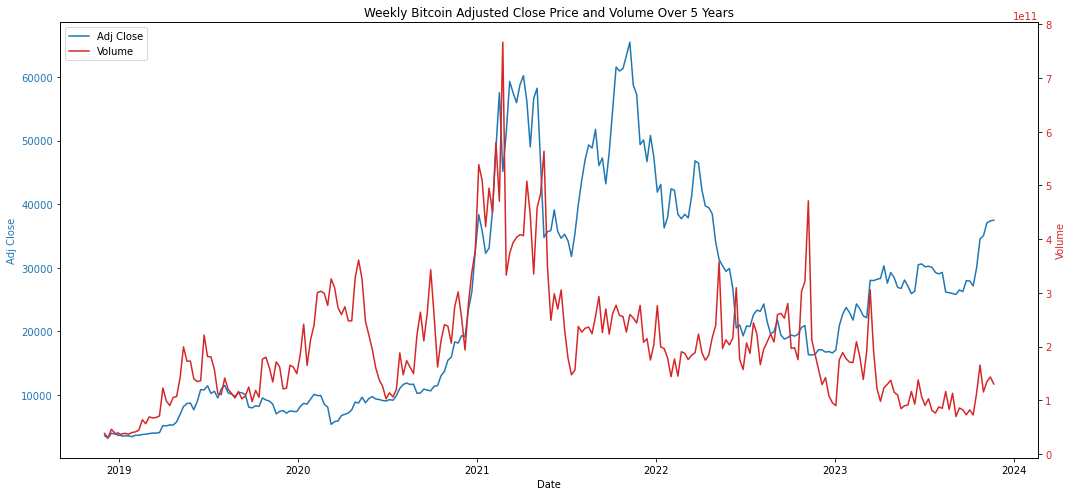

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting 'Adj Close' on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Adj Close', color='tab:blue')
ax1.plot(btc_weekly['Date'], btc_weekly['Adj Close'], color='tab:blue', label='Adj Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a twin axis for 'Volume'
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:red')
ax2.plot(btc_weekly['Date'], btc_weekly['Volume'], color='tab:red', label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding a title and a legend
plt.title('Weekly Bitcoin Adjusted Close Price and Volume Over 5 Years')
fig.tight_layout()

# Creating a combined legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()


## Q4.0 - feature creation (10 pts)

If you couldn't finish Q1, please use `Q1_backup.csv`.

In the **next problem**, we want to model the relationship between different keywords and the rise/fall of bitcoin prices. This is preparing our datasets for the next question.

- First, please add 2 additional columns to `guardian_df` by using **a single regular expression** for each:
  - `positive_title`: this is 1 if one of the `good_words` (see below) are in the `webTitle`. 0 otherwise.
  - `negative_title`: this is 1 if one of the `bad_words` (see below) are in the `webTitle`. 0 otherwise.
- Please print out the total number of positive and negative titles across all records.
- Please report the number of titles that are both positive and negative.
```
bad_words = ["plung", "crash", "drop", "tumble", "retreat", "low", "lose", "slide", "fizzle", "sell", "fear"]
good_words = ["buy", "rebound", "climb", "rise", "boom", "buy", "high", "surge", "jump", "soar", "grow"]
```

In [ ]:
import pandas as pd


# Update the lists of good and bad words
bad_words = ["plung", "crash", "drop", "tumble", "retreat", "low", "lose", "slide", "fizzle", "sell", "fear"]
good_words = ["buy", "rebound", "climb", "rise", "boom", "high", "surge", "jump", "soar", "grow"]

# Add the 'positive_title' column
good_pattern = '|'.join(good_words)  # Create a regex pattern for good words
guardian_df['positive_title'] = guardian_df['webTitle'].str.contains(good_pattern, case=False, regex=True).astype(int)

# Add the 'negative_title' column
bad_pattern = '|'.join(bad_words)  # Create a regex pattern for bad words
guardian_df['negative_title'] = guardian_df['webTitle'].str.contains(bad_pattern, case=False, regex=True).astype(int)

# Print out the total number of positive and negative titles
total_positive_titles = guardian_df['positive_title'].sum()
total_negative_titles = guardian_df['negative_title'].sum()
print(f"the total number of positive titles is {total_positive_titles}")
print(f"the total number of negative titles is {total_negative_titles}")
# Report the number of titles that are both positive and negative
both_positive_and_negative = (guardian_df['positive_title'] & guardian_df['negative_title']).sum()
print(f"the number of titles that are both positive and negative is {both_positive_and_negative}")



the total number of positive titles is 64
the total number of negative titles is 36
the number of titles that are both positive and negative is 12


## Q4.1 - Feature creation part 2 (10 pts)

Continuing from Q4.0, if you couldn't finish Q4.0, please use `Q1_backup.csv`.

- Please calculate the frequency for each of the keyword columns and the 2 new columns for each week (the week definition should be the same as `btc_weekly`). These frequencies should be stored in a data frame named `X`.
  - The columns of `X` should be all the keywords from the tags plus `positive_title` and `negative_title`.
  - For incomplete weeks, due to the exam nature, please assume those days have 0 occurrences for all features. If a week is completely missing, you do not need to create a record for it.
  -  HINT: To get the date of the "following Sunday" for any date, you can do
  ```
  from datetime import date, timedelta
  dt = date(2023, 12, 8)
  days_until_sunday = 6 - dt.weekday()
  sunday_date = dt + timedelta(days=days_until_sunday)
  print(sunday_date)
  ```
- Please sort the columns in `X` according to their total frequency across all weeks. So the first column should be the most popular (i.e. most articles include this keyword) feature and the last column should be the least popular. Call this variable `X_ord`.
  - Ties can be in any order. Do not lose the column names.
- Please print out the data for the last 2 weeks for `X_ord` along with the features (column names) they correspond to.


In [ ]:
guardian_df['date'] = pd.to_datetime(guardian_df['date'])
guardian_df['week_ending'] = guardian_df['date'].apply(get_next_sunday)

# Group by 'week_ending' and calculate the frequency for each keyword and the new columns
X = guardian_df.groupby('week_ending').sum()

# Sort the columns in X by their total frequency across all weeks
X_ord = X.reindex(X.sum().sort_values(ascending=False).index, axis=1)

# Print out the data for the last two weeks for X_ord and the feature names
last_two_weeks_X_ord = X_ord.tail(2)


In [ ]:
print(last_two_weeks_X_ord)

print("Column Names:")
print(", ".join(last_two_weeks_X_ord.columns))

             Business  Cryptocurrencies  Technology  Stock_markets  \
week_ending                                                          
2021-05-17         10                11           5              4   
2021-05-24          6                 6           4              2   

             positive_title  Bitcoin  Economics  World_news  UK_news  FTSE  \
week_ending                                                                  
2021-05-17                2        9          7           3        4     4   
2021-05-24                4        3          1           2        4     2   

             ...  Steel_industry  Greensill  Rolls-Royce  BAE_Systems  \
week_ending  ...                                                        
2021-05-17   ...               0          0            0            0   
2021-05-24   ...               1          1            1            1   

             Serious_Fraud_Office  Cineworld  Conservation  Climate_science  \
week_ending                       

## Q5 - SQL (5 pts)

In the file `final2023.db`, we have the data similar to `guardian_df` in a table called `guardian`.

Please write the SQL query into the variable `query` that would compute the fraction of articles with positive titles (see Q4) for each possible type of `pillarName`, e.g. Arts, News, etc.
- Your query should return the pillarName AND the respective fraction.
- please use `sqlite3` and SQL to complete this question
- The column names of the table are the same as the columns in `guardian_df`.
- Please PRINT OUT your calculated fractions for each of the pillarName values.

In [ ]:
import sqlite3

# Please edit the path correctly.
connection = sqlite3.connect('final2023.db')

query = """
SELECT pillarName,
       SUM(positive_title) * 1.0 / COUNT(*) AS fraction_positive_title
FROM guardian
GROUP BY pillarName;
"""

cursor = connection.cursor()
print(cursor.execute(query).fetchall())
connection.close()



[('Arts', 0.0), ('Lifestyle', 0.5), ('News', 0.3157894736842105), ('Opinion', 0.0), ('Sport', 0.0)]


## Q6 - Modeling (25 pts)

Using `X_ord` and `btc_weekly` (or use `Q4_backup.csv` and `Q2_backup.csv` if you couldn't complete Q4 and Q2), we will predict the `Adj Close` by the frequency of the `p` most popular keywords (recall what `ord` means in `X_ord`) in respective weeks.

Please use linear regression to solve this problem.

This is not a good approach but we're doing this given the exam constraints.

- Please make sure you're only using weeks that are entirely in the range of `2020-05-01` to `2021-05-31`.
  - Hint: `2020-05-04` and `2021-05-31` are both Mondays.
- What value of `p` will minimize a 5-fold cross-validated RMSE?
  - Please limit `p` to values below `20`.
  - Please set the `random_state` to the value `5206` when constituting K-fold cross-validation sets.
  - We will compare 20 models, and the $i$-th model uses the first $i$ features in `X_ord`.
- Please report all the coefficients from training the best model with all the data.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Filter data within the specified date range
start_date = pd.to_datetime('2020-05-01')
end_date = pd.to_datetime('2021-05-31')
btc_weekly_ = btc_weekly[(btc_weekly['Date'] >= start_date) & (btc_weekly['Date'] <= end_date)]


# Define the target variable
y = btc_weekly_['Adj Close']

# Initialize variables to store results
best_p = None
best_rmse = float('inf')
best_model = None
best_coeffs = None

# Set random_state for reproducibility
random_state = 5206

# Iterate through different values of p
for p in range(1, 21):
    # Extract the p most popular keywords for each week
    X_p = X_ord.iloc[:, :p]

    # Standardize the input features
    scaler = StandardScaler()
    X_p = scaler.fit_transform(X_p)

    # Initialize linear regression model
    model = LinearRegression()

    # Perform 5-fold time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_index, test_index in tscv.split(X_p):
        X_train, X_test = X_p[train_index], X_p[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Calculate mean RMSE across folds
    avg_rmse = np.mean(rmse_scores)

    # Check if this model has the lowest RMSE
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_p = p
        best_model = model
        best_coeffs = model.coef_

# Report the value of p that minimizes RMSE
print("Best value of p:", best_p)
print("5-fold Cross-Validated RMSE with the best model:", best_rmse)


# Get the coefficients from the best model
coefficients = best_model.coef_

# Report the coefficients
print("Coefficients of the best model:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i + 1}: {coef:.4f}")


Best value of p: 9
5-fold Cross-Validated RMSE with the best model: 8533.803199644895
Coefficients of the best model:
Feature 1: 4110.1843
Feature 2: 11150.3222
Feature 3: -606.4757
Feature 4: -761.9289
Feature 5: -1460.1547
Feature 6: -10673.0473
Feature 7: 677.2334
Feature 8: -185.3090
Feature 9: 1476.4415


## Q7 - Good enough? (NO CODE, 10 pts)

The approach in Q6 requires data from The Guardian. Depending on external data sources always comes with data quality issues. So the model using external data should be much better than a "naive model".

How would you determine if the model in Q6 is good enough, i.e. what is a reasonable naive model would you compare the predictive accuracy against?

There are multiple correct answers!

<!-- Time-Series Baseline: we can use a basic autoregressive model, such as naive forecasting, to estimate the upcoming value based on the prior value, if your problem contains time-series data (such as stock prices). The temporal aspect of the data is taken into consideration by this baseline.

Business measurements: Finally, the selection of an appropriate naive model is influenced by the business objectives and measurements. Consider what amount of improvement in a certain business indicator and the model must achieve to be regarded valuable. -->

Business measurements: Finally, the selection of an appropriate naive model is influenced by the business objectives and measurements. Consider what amount of improvement in a certain business indicator the model must achieve to be regarded valuable.

Historical Average: A naive model that predicts the target variable based on the historical average for the same time period can also be used.